# Artificial  Neural Networks
This is an introduction on the topic.

## Import Everything

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Pepare Test and Train Data

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test_orig = x_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Setup Convolutional Neural Network
Add x, y, and z layers and make this shiz work :D

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Here we see the images we are working with:

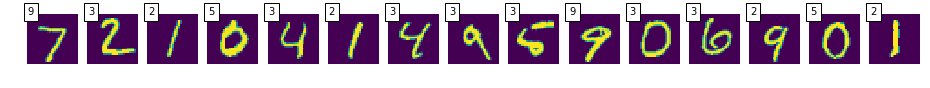

In [6]:
slice = 15
predicted = model.predict(x_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(x_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

## Train and Display Results

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.2715 - acc: 0.9163 - val_loss: 0.0613 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0909 - acc: 0.9732 - val_loss: 0.0424 - val_acc: 0.9851
Epoch 3/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0676 - acc: 0.9798 - val_loss: 0.0374 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0551 - acc: 0.9831 - val_loss: 0.0328 - val_acc: 0.9874
Epoch 5/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0291 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0435 - acc: 0.9869 - val_loss: 0.0276 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0390 - acc: 0.9879 - val_loss: 0.0260 - 

This is the shape of our layers:

In [8]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

Layer 0 	 conv2d_1 		 (None, 28, 28, 1) 	 (None, 26, 26, 32)
Layer 1 	 conv2d_2 		 (None, 26, 26, 32) 	 (None, 24, 24, 64)
Layer 2 	 max_pooling2d_1 		 (None, 24, 24, 64) 	 (None, 12, 12, 64)
Layer 3 	 dropout_1 		 (None, 12, 12, 64) 	 (None, 12, 12, 64)
Layer 4 	 flatten_1 		 (None, 12, 12, 64) 	 (None, 9216)
Layer 5 	 dense_1 		 (None, 9216) 	 (None, 128)
Layer 6 	 dropout_2 		 (None, 128) 	 (None, 128)
Layer 7 	 dense_2 		 (None, 128) 	 (None, 10)


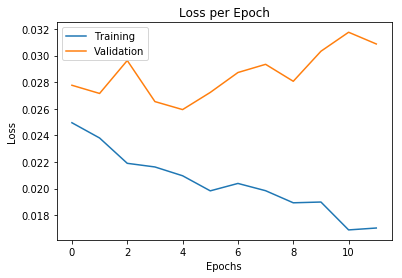

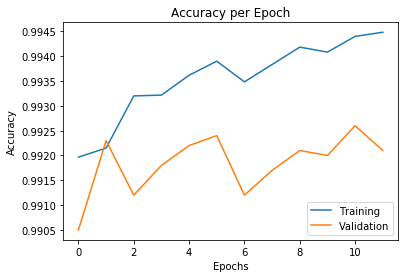

In [24]:
%matplotlib inline

plt.figure()
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')